<IPython.core.display.Javascript object>


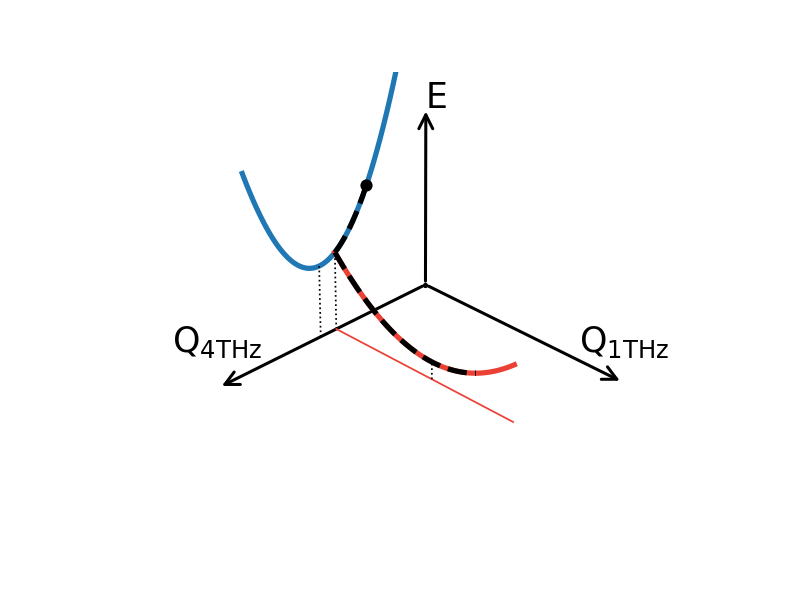

50
0.0


In [91]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from mpl_toolkits.mplot3d import proj3d
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

from matplotlib.patches import FancyArrowPatch

#Source :
#https://stackoverflow.com/questions/22867620/... the rest is on next line
#...putting-arrowheads-on-vectors-in-matplotlibs-3d-plot (remove ...)
class Arrow3D(FancyArrowPatch):
    """Draw arrows in 3D"""
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


fig = plt.figure()
ax = fig.gca(projection='3d')

cblue = '#1f77b4'
cred = '#eb4034'
cgreen = '#2ca02c'
corange = '#ff7f0e'



dE = 0.4
# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = -np.cos(x * 4 * np.pi) / 2
def Eq(x,a=1,c=0):
    return c + a*(x)**2

A4 = 5.5
A1 = 0.6

def q4(x, a4=A4, c4=dE):
    return Eq(x,a=a4, c=c4)

def q1(y, xp, y01, a1=A1):
    zp = q4(xp)
    c1 = zp-a1*(-y01)**2
    return Eq((y-y01), a=a1, c=c1)
    
def Eq_2D(x,y):
    return dE + 2.5*(x)**2 + 2.5*(y)**2




x_lim = 0.5
y_lim = 1.5


# q4
x = np.linspace(-0.7*x_lim, x_lim ,100)
ax.plot(x, q4(x), zs=0, zdir='x', color=cblue, linewidth=3)

#q1
y = np.linspace(0, 0.9*y_lim, 100)



y01 = 0.5*y_lim


xp_idx = np.max(np.where(x < (A1* y01)/A4))
print(xp_idx)
xp = x[xp_idx]

ax.plot(y, q1(y, xp=xp, y01=y01), zs=xp, zdir='y', color=cred, linewidth=3)


opts_eye_guide=dict(color="black", linewidth=1, linestyle=":")

# line to show minimum of q1
ax.plot([0, 0],[0, q4(0)] , zs=0, zdir='x', **opts_eye_guide)

# line to show q1 and q4 intersection
ax.plot([xp, xp],[0, q4(xp)] , zs=0, zdir='x', **opts_eye_guide)


# line underneath q1
ax.plot(y, np.zeros(np.shape(y)), zs=xp, zdir='y', color=cred, linewidth=1)


ax.plot([y01, y01], [0, q1(y01, xp=xp, y01=y01)], zs=xp, zdir='y', **opts_eye_guide)

# ballistic motion
opts_path=dict(color="black", linewidth=3, linestyle="--")

x_path_start_idx = 70



# path on q4
x_path = x[xp_idx:x_path_start_idx]
ax.plot([x_path[-1]], [q4(x_path[-1])], zs=0, zdir='x', color="black", marker="o")
ax.plot(x_path, q4(x_path), zs=0, zdir='x', **opts_path)
# path on q1
y_path = y[:80]
ax.plot(y_path, q1(y_path, xp=xp, y01=y01), zs=xp, zdir='y', **opts_path)
    
    
    
    

E_x = 1.1*x_lim

ax.plot([0], [E_x], zs=0, zdir="z", color="black", marker="o", markersize=2)

E = Arrow3D([0,0], [E_x ,E_x ], [1,0], 
                mutation_scale = 20, lw = 1.75, arrowstyle="<-", 
                color = "black") 

ax.add_artist(E)




Q_4 = Arrow3D([0,0], [E_x ,-x_lim], [0,0], 
                mutation_scale = 20, lw = 1.75, arrowstyle="->", 
                color = "black", linestyle="-") 

ax.add_artist(Q_4)



Q_1 = Arrow3D([0,y_lim], [E_x ,E_x], [0,0], 
                mutation_scale = 20, lw = 1.75, arrowstyle="->", 
                color = "black", linestyle="-") 

ax.add_artist(Q_1)




# Make legend, set axes limits and labels
# Q4
ax.set_ylim(-x_lim, x_lim)
ax.text(0, -x_lim, .2 ,"Q$_\mathrm{4 THz}$", fontsize=20, ha="center")
# Q1
ax.set_xlim(0, y_lim)
ax.text(y_lim, E_x, .17 ,"Q$_\mathrm{1 THz}$", fontsize=20, ha="center")
# E
ax.set_zlim(0, 1)
ax.text(0, E_x, 1 ,"E", fontsize=20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Turn the axis off
plt.axis('off')
# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=30., azim=-45)
print(y[0])
plt.show
plt.savefig('cartoon_two_parabolas.svg', dpi = 300, transparent = False)